In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('customer_booking_new.csv', encoding = 'UTF-8')
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.columns


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

# Описание колонок

# Проверка на пустые значения

In [5]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

# Поиск дубликатов

In [6]:
double_rows_tail = df[df.duplicated()] # показывает строки которые дублируют строку в таблице
double_rows_tail

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
456,1,Internet,RoundTrip,30,85,15,Fri,AKLKUL,Malaysia,1,0,0,8.83,1
513,3,Internet,RoundTrip,109,20,4,Tue,AKLKUL,Singapore,1,0,1,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49852,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49902,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49934,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49944,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0


In [7]:
double_rows_head = df[df.duplicated(keep='last')] # показывает первую встречающуюся строку, которая имеет дубли в таблице.
double_rows_head

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
115,1,Internet,RoundTrip,65,278,2,Thu,AKLKUL,Malaysia,0,0,0,8.83,0
117,1,Internet,RoundTrip,263,58,4,Sun,AKLKUL,Malaysia,0,1,0,8.83,0
122,1,Internet,RoundTrip,42,17,14,Tue,AKLKUL,Malaysia,0,0,0,8.83,1
135,4,Internet,RoundTrip,366,17,16,Sun,AKLKUL,Malaysia,1,0,1,8.83,0
177,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49829,2,Internet,RoundTrip,204,6,14,Tue,PENTPE,Malaysia,1,0,0,4.67,0
49836,1,Mobile,RoundTrip,106,6,11,Fri,PENTPE,Taiwan,1,0,0,4.67,0
49905,1,Internet,RoundTrip,2,6,3,Thu,PENTPE,Malaysia,0,0,1,4.67,0
49911,1,Internet,RoundTrip,30,6,7,Thu,PENTPE,Taiwan,0,0,0,4.67,0


In [8]:
df.iloc[[177, 196, 316, 384]]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
177,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
196,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
316,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0
384,5,Internet,RoundTrip,206,17,13,Sun,AKLKUL,Malaysia,1,0,0,8.83,0


In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [15]:
df.to_csv(r"C:\Users\User\Python311_4\newclasswork\final_project\alldata.csv", index=False, sep=",")
# сохраняем очищенный файл от дубликатов

# Сводная по колонкам

In [ ]:
df=pd.read_csv('customer_booking_new.csv', encoding = 'UTF-8')
df

In [11]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000,49281.000000
mean,1.590187,84.723281,23.053976,9.070676,0.668229,0.295631,0.426635,7.279974,0.149977
std,1.016538,90.410229,33.832149,5.413099,0.470854,0.456331,0.494593,1.496390,0.357052
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


<Axes: title={'center': 'booking_complete'}, ylabel='count'>

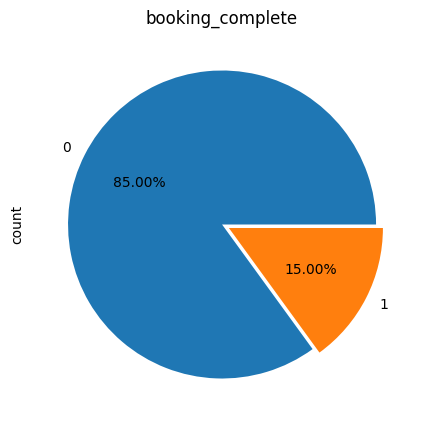

In [12]:
plt.figure(figsize = (11,5))
#plt.plot()
plt.title(df.columns[-1])
df['booking_complete'].value_counts().plot(kind = 'pie', autopct = '%.2f%%', explode = [0, 0.05])

# Работа со столбцами

In [13]:
t_col = ['sales_channel', 'trip_type','flight_day','route','booking_origin']
for col in t_col:
    print(f'value counts in {col} column')
    print(df[col].value_counts())
    print(' ')

value counts in sales_channel column
sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64
 
value counts in trip_type column
trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64
 
value counts in flight_day column
flight_day
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64
 
value counts in route column
route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64
 
value counts in booking_origin column
booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Sva

In [14]:
df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [15]:
nums_int = ['length_of_stay', 'purchase_lead', 'flight_duration']

C:\Users\User\AppData\Local\Temp\ipykernel_9512\3227896205.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


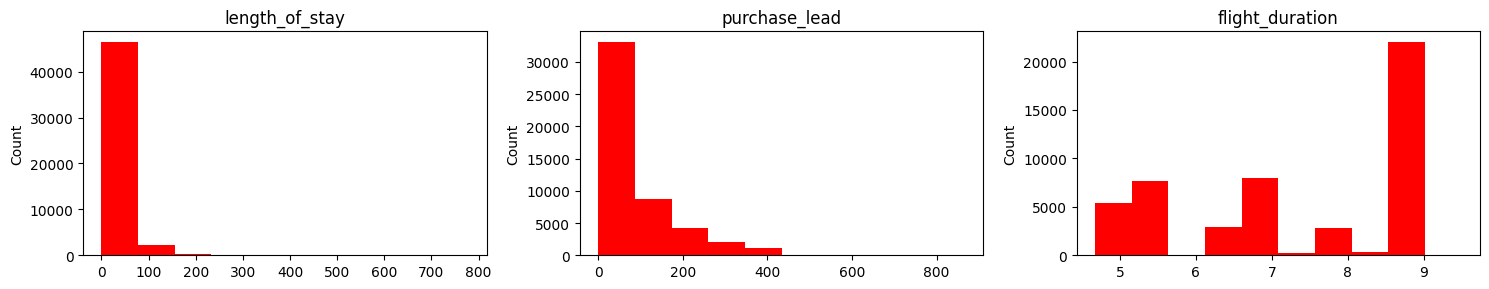

In [16]:
plt.figure(figsize=(15,3))
for i in range(0,len(nums_int)):
    plt.subplot(1,len(nums_int),i+1)
    plt.title(nums_int[i])
    plt.ylabel('Count')
    plt.hist(df[nums_int[i]], color='red')
    plt.tight_layout()

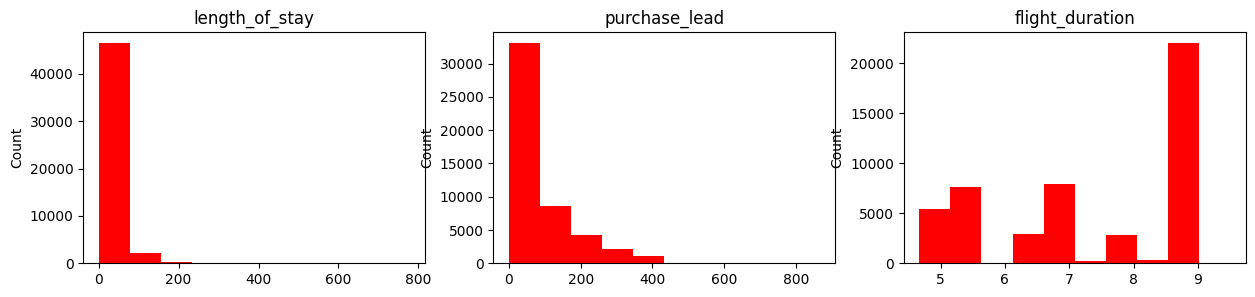

In [17]:
plt.figure(figsize=(15,3))
for i in range(0,len(nums_int)):
    plt.subplot(1,len(nums_int),i+1)
    plt.title(nums_int[i])
    plt.ylabel('Count')
    plt.hist(df[nums_int[i]], color='red')

C:\Users\User\AppData\Local\Temp\ipykernel_9512\1902751333.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\User\AppData\Local\Temp\ipykernel_9512\1902751333.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


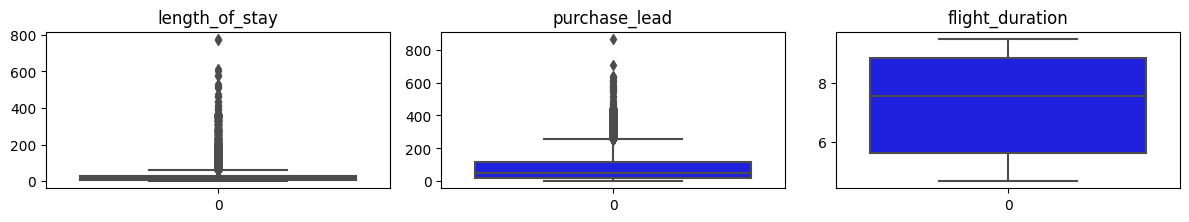

In [18]:
plt.figure(figsize=(12,6))
for i in range(0,len(nums_int)):
    plt.subplot(3,len(nums_int),i+1)
    plt.title(nums_int[i])
    sns.boxplot(df[nums_int[i]],color='blue')
    plt.tight_layout()

In [19]:
days = {
    'Mon' : 1,
    'Tue' : 2,
    'Wed' : 3, 
    'Thu' : 4,
    'Fri' : 5,
    'Sat' : 6,
    'Sun' : 7
}
df['flight_day'] = df['flight_day'].map(days)
df['flight_day'] 
# оцифровываем категориальный столбец дни недели

C:\Users\User\AppData\Local\Temp\ipykernel_9512\1068847879.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flight_day'] = df['flight_day'].map(days)


0        6
1        6
2        3
3        6
4        3
        ..
49995    6
49996    7
49997    6
49998    1
49999    4
Name: flight_day, Length: 49281, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
route_encoded = encoder.fit_transform(df[['route']])
route_encoded


C:\Users\User\Python311_4\newclasswork\ve\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([  0,   0,   0, ..., 720, 720, 720])

In [21]:
route_encoded[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [22]:
df.head(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,1,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0


In [23]:
booking_origin_encoded = encoder.fit_transform(df[['booking_origin']])
booking_origin_encoded

C:\Users\User\Python311_4\newclasswork\ve\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([61, 61, 36, ...,  4,  4,  4])

In [24]:
df['booking_origin'] = booking_origin_encoded
df['route'] = route_encoded

C:\Users\User\AppData\Local\Temp\ipykernel_9512\3452934929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['booking_origin'] = booking_origin_encoded
C:\Users\User\AppData\Local\Temp\ipykernel_9512\3452934929.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['route'] = route_encoded


In [25]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,0,61,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,0,61,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,0,36,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,0,61,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,0,36,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,720,4,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,720,4,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,720,4,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,720,4,1,0,1,5.62,0


In [26]:
channels = pd.get_dummies(df['sales_channel'], prefix = 'my', drop_first = False)
channels

,my_Internet,my_Mobile
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
...,...,...
49995,True,False
49996,True,False
49997,True,False
49998,True,False


In [27]:
trip = pd.get_dummies(df['trip_type'], prefix = 'my', drop_first = False)
trip

,my_CircleTrip,my_OneWay,my_RoundTrip
0,False,False,True
1,False,False,True
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
49995,False,False,True
49996,False,False,True
49997,False,False,True
49998,False,False,True


In [28]:
df_num = pd.concat([df, channels, trip], axis=1)
df_num

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,my_Internet,my_Mobile,my_CircleTrip,my_OneWay,my_RoundTrip
0,2,Internet,RoundTrip,262,19,7,6,0,61,1,0,0,5.52,0,True,False,False,False,True
1,1,Internet,RoundTrip,112,20,3,6,0,61,0,0,0,5.52,0,True,False,False,False,True
2,2,Internet,RoundTrip,243,22,17,3,0,36,1,1,0,5.52,0,True,False,False,False,True
3,1,Internet,RoundTrip,96,31,4,6,0,61,0,0,1,5.52,0,True,False,False,False,True
4,2,Internet,RoundTrip,68,22,15,3,0,36,1,0,1,5.52,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,720,4,1,0,1,5.62,0,True,False,False,False,True
49996,1,Internet,RoundTrip,111,6,4,7,720,4,0,0,0,5.62,0,True,False,False,False,True
49997,1,Internet,RoundTrip,24,6,22,6,720,4,0,0,1,5.62,0,True,False,False,False,True
49998,1,Internet,RoundTrip,15,6,11,1,720,4,1,0,1,5.62,0,True,False,False,False,True


In [29]:
df_num.drop(['sales_channel','trip_type'],axis=1,inplace=True)

In [30]:
df_num

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,my_Internet,my_Mobile,my_CircleTrip,my_OneWay,my_RoundTrip
0,2,262,19,7,6,0,61,1,0,0,5.52,0,True,False,False,False,True
1,1,112,20,3,6,0,61,0,0,0,5.52,0,True,False,False,False,True
2,2,243,22,17,3,0,36,1,1,0,5.52,0,True,False,False,False,True
3,1,96,31,4,6,0,61,0,0,1,5.52,0,True,False,False,False,True
4,2,68,22,15,3,0,36,1,0,1,5.52,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,720,4,1,0,1,5.62,0,True,False,False,False,True
49996,1,111,6,4,7,720,4,0,0,0,5.62,0,True,False,False,False,True
49997,1,24,6,22,6,720,4,0,0,1,5.62,0,True,False,False,False,True
49998,1,15,6,11,1,720,4,1,0,1,5.62,0,True,False,False,False,True


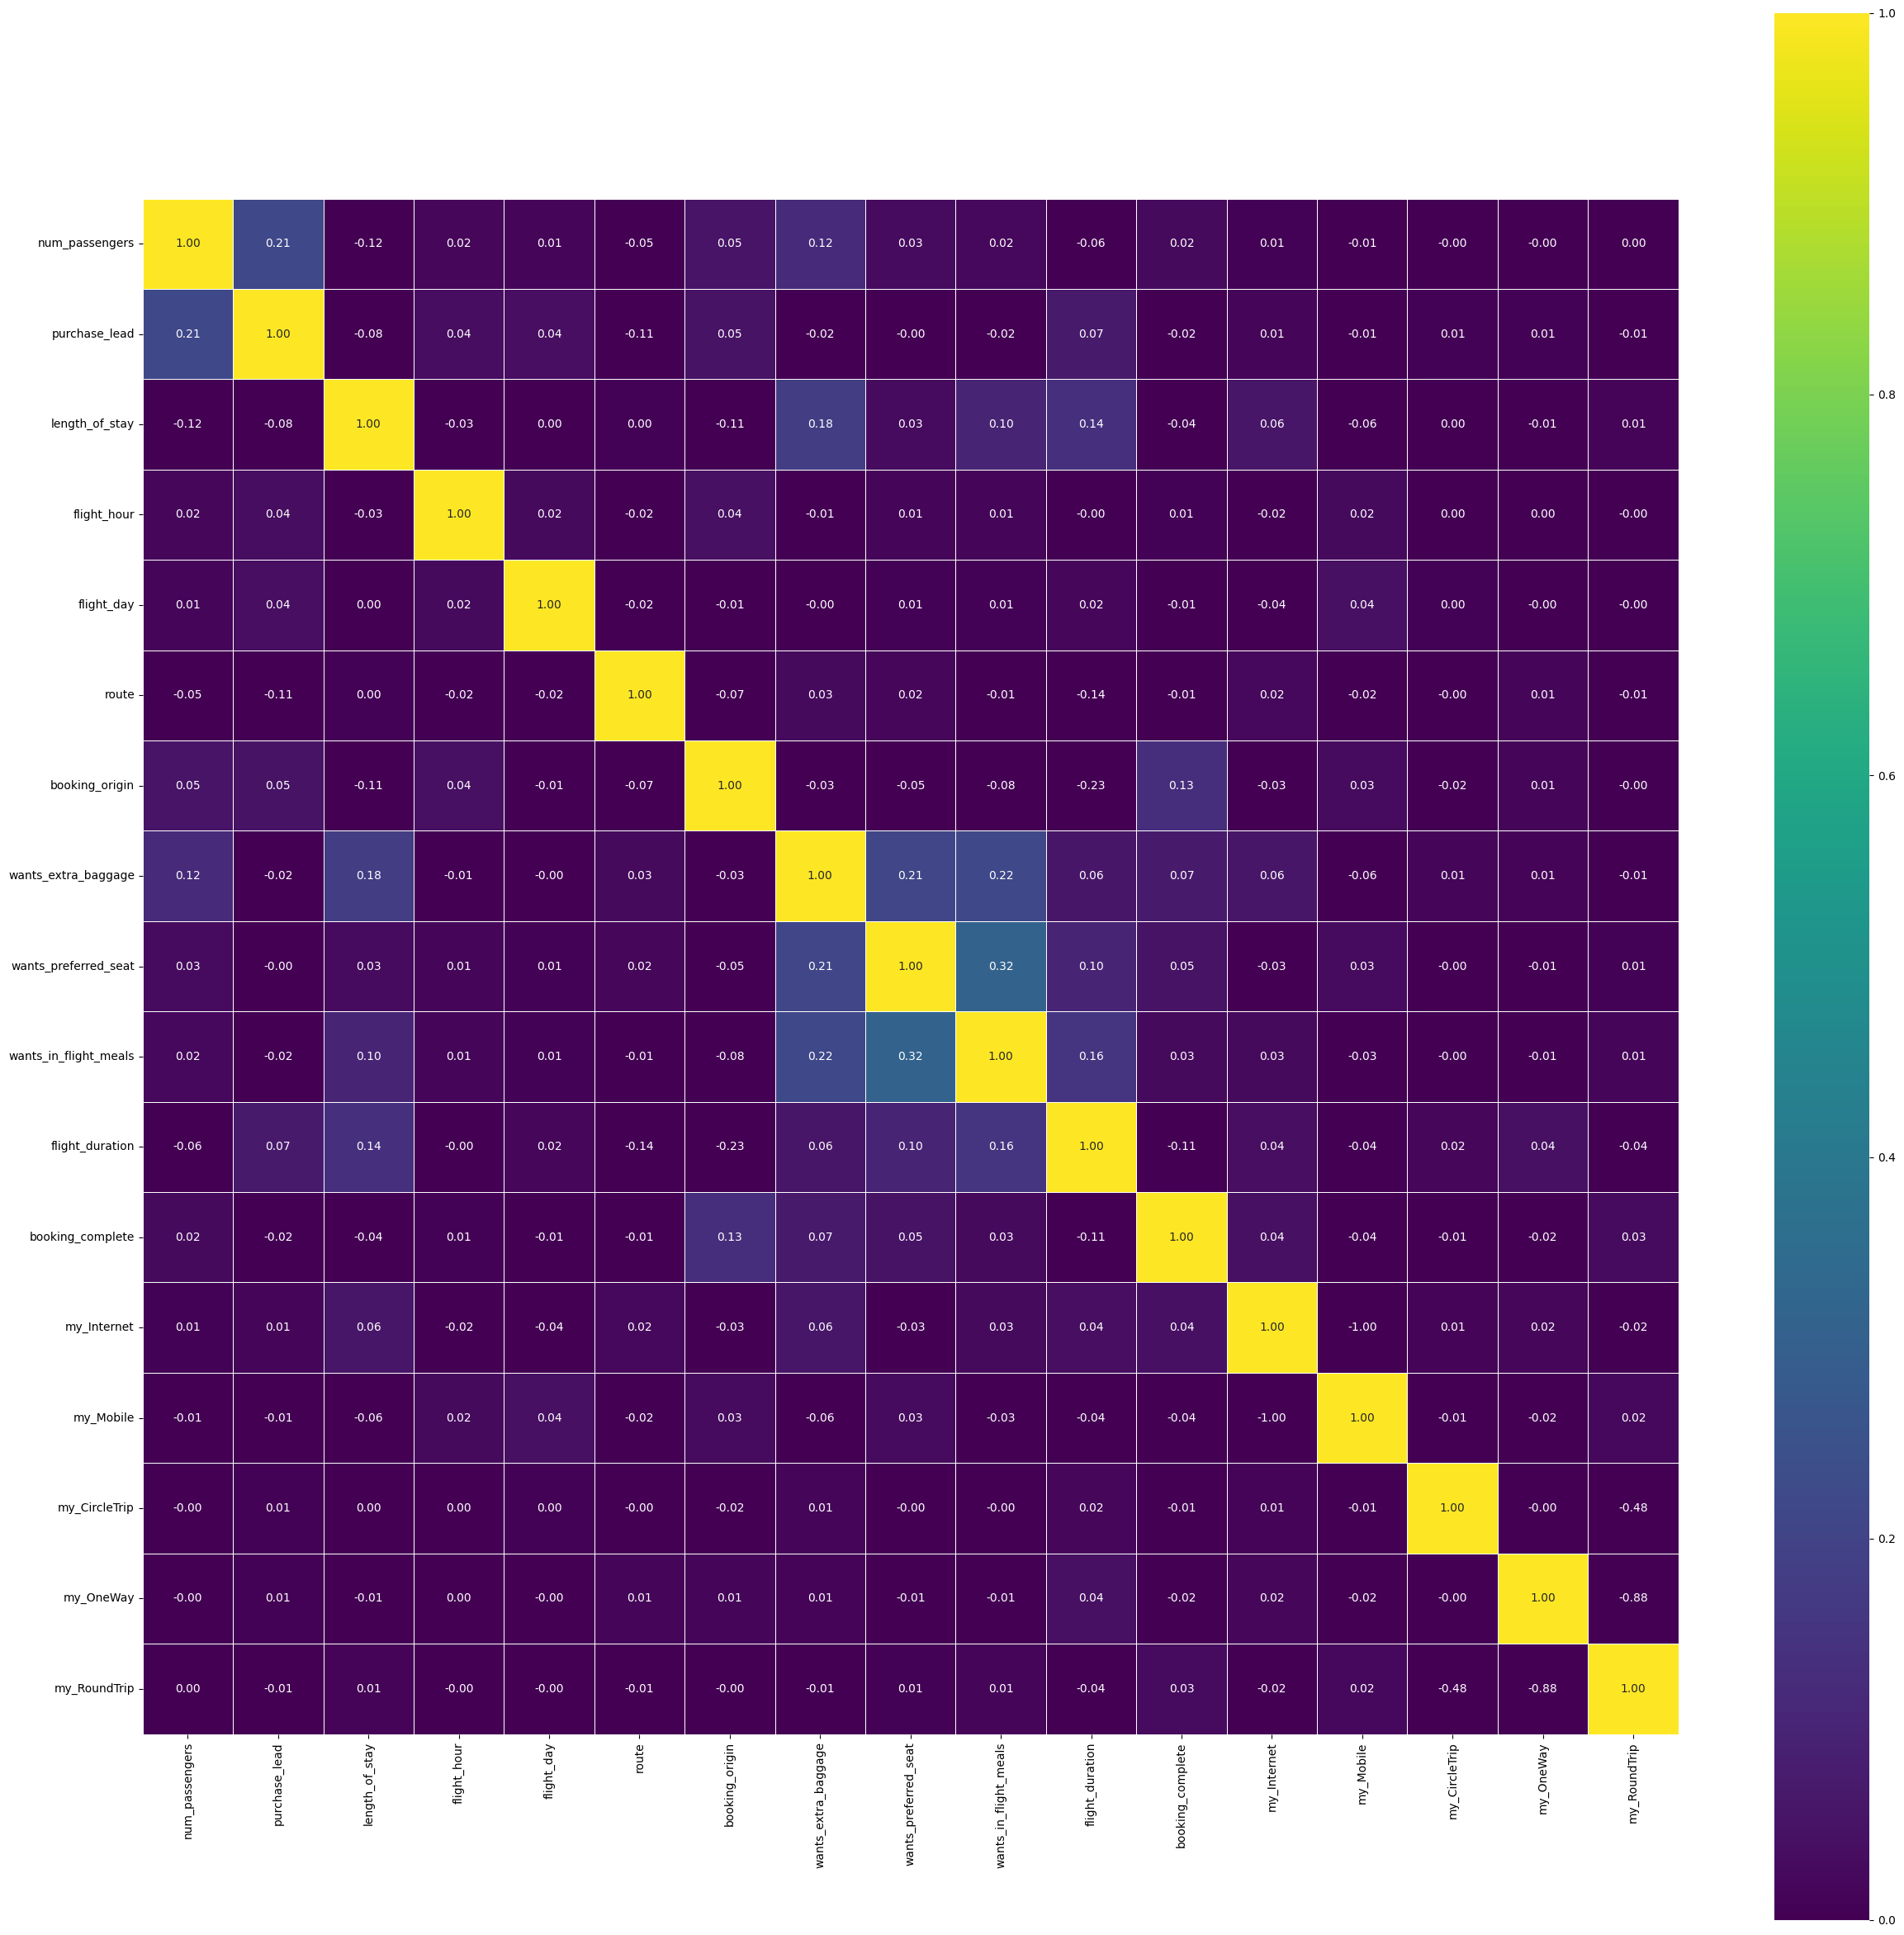

In [31]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_num.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis', square = True)
plt.show() 

# Успешные бронирования

In [32]:
df_completed = df_num[df_num['booking_complete'] == 1]
df_completed.drop(['booking_complete'],axis=1,inplace=True)
df_completed

C:\Users\User\AppData\Local\Temp\ipykernel_9512\3778488408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_completed.drop(['booking_complete'],axis=1,inplace=True)


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,my_Internet,my_Mobile,my_CircleTrip,my_OneWay,my_RoundTrip
82,1,15,31,17,1,6,51,0,0,0,8.83,True,False,False,False,True
86,1,156,19,14,1,6,51,1,0,0,8.83,True,False,False,False,True
94,1,181,87,2,2,6,80,1,0,1,8.83,True,False,False,False,True
109,1,127,17,16,2,6,51,1,0,1,8.83,False,True,False,False,True
122,1,42,17,14,2,6,51,0,0,0,8.83,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49972,1,33,6,6,3,717,91,1,1,0,4.67,True,False,False,False,True
49977,2,15,6,16,2,717,51,1,1,1,4.67,True,False,False,False,True
49980,4,242,6,9,2,719,51,1,0,1,5.00,True,False,False,False,True
49984,2,7,6,4,3,720,4,0,0,0,5.62,True,False,False,False,True


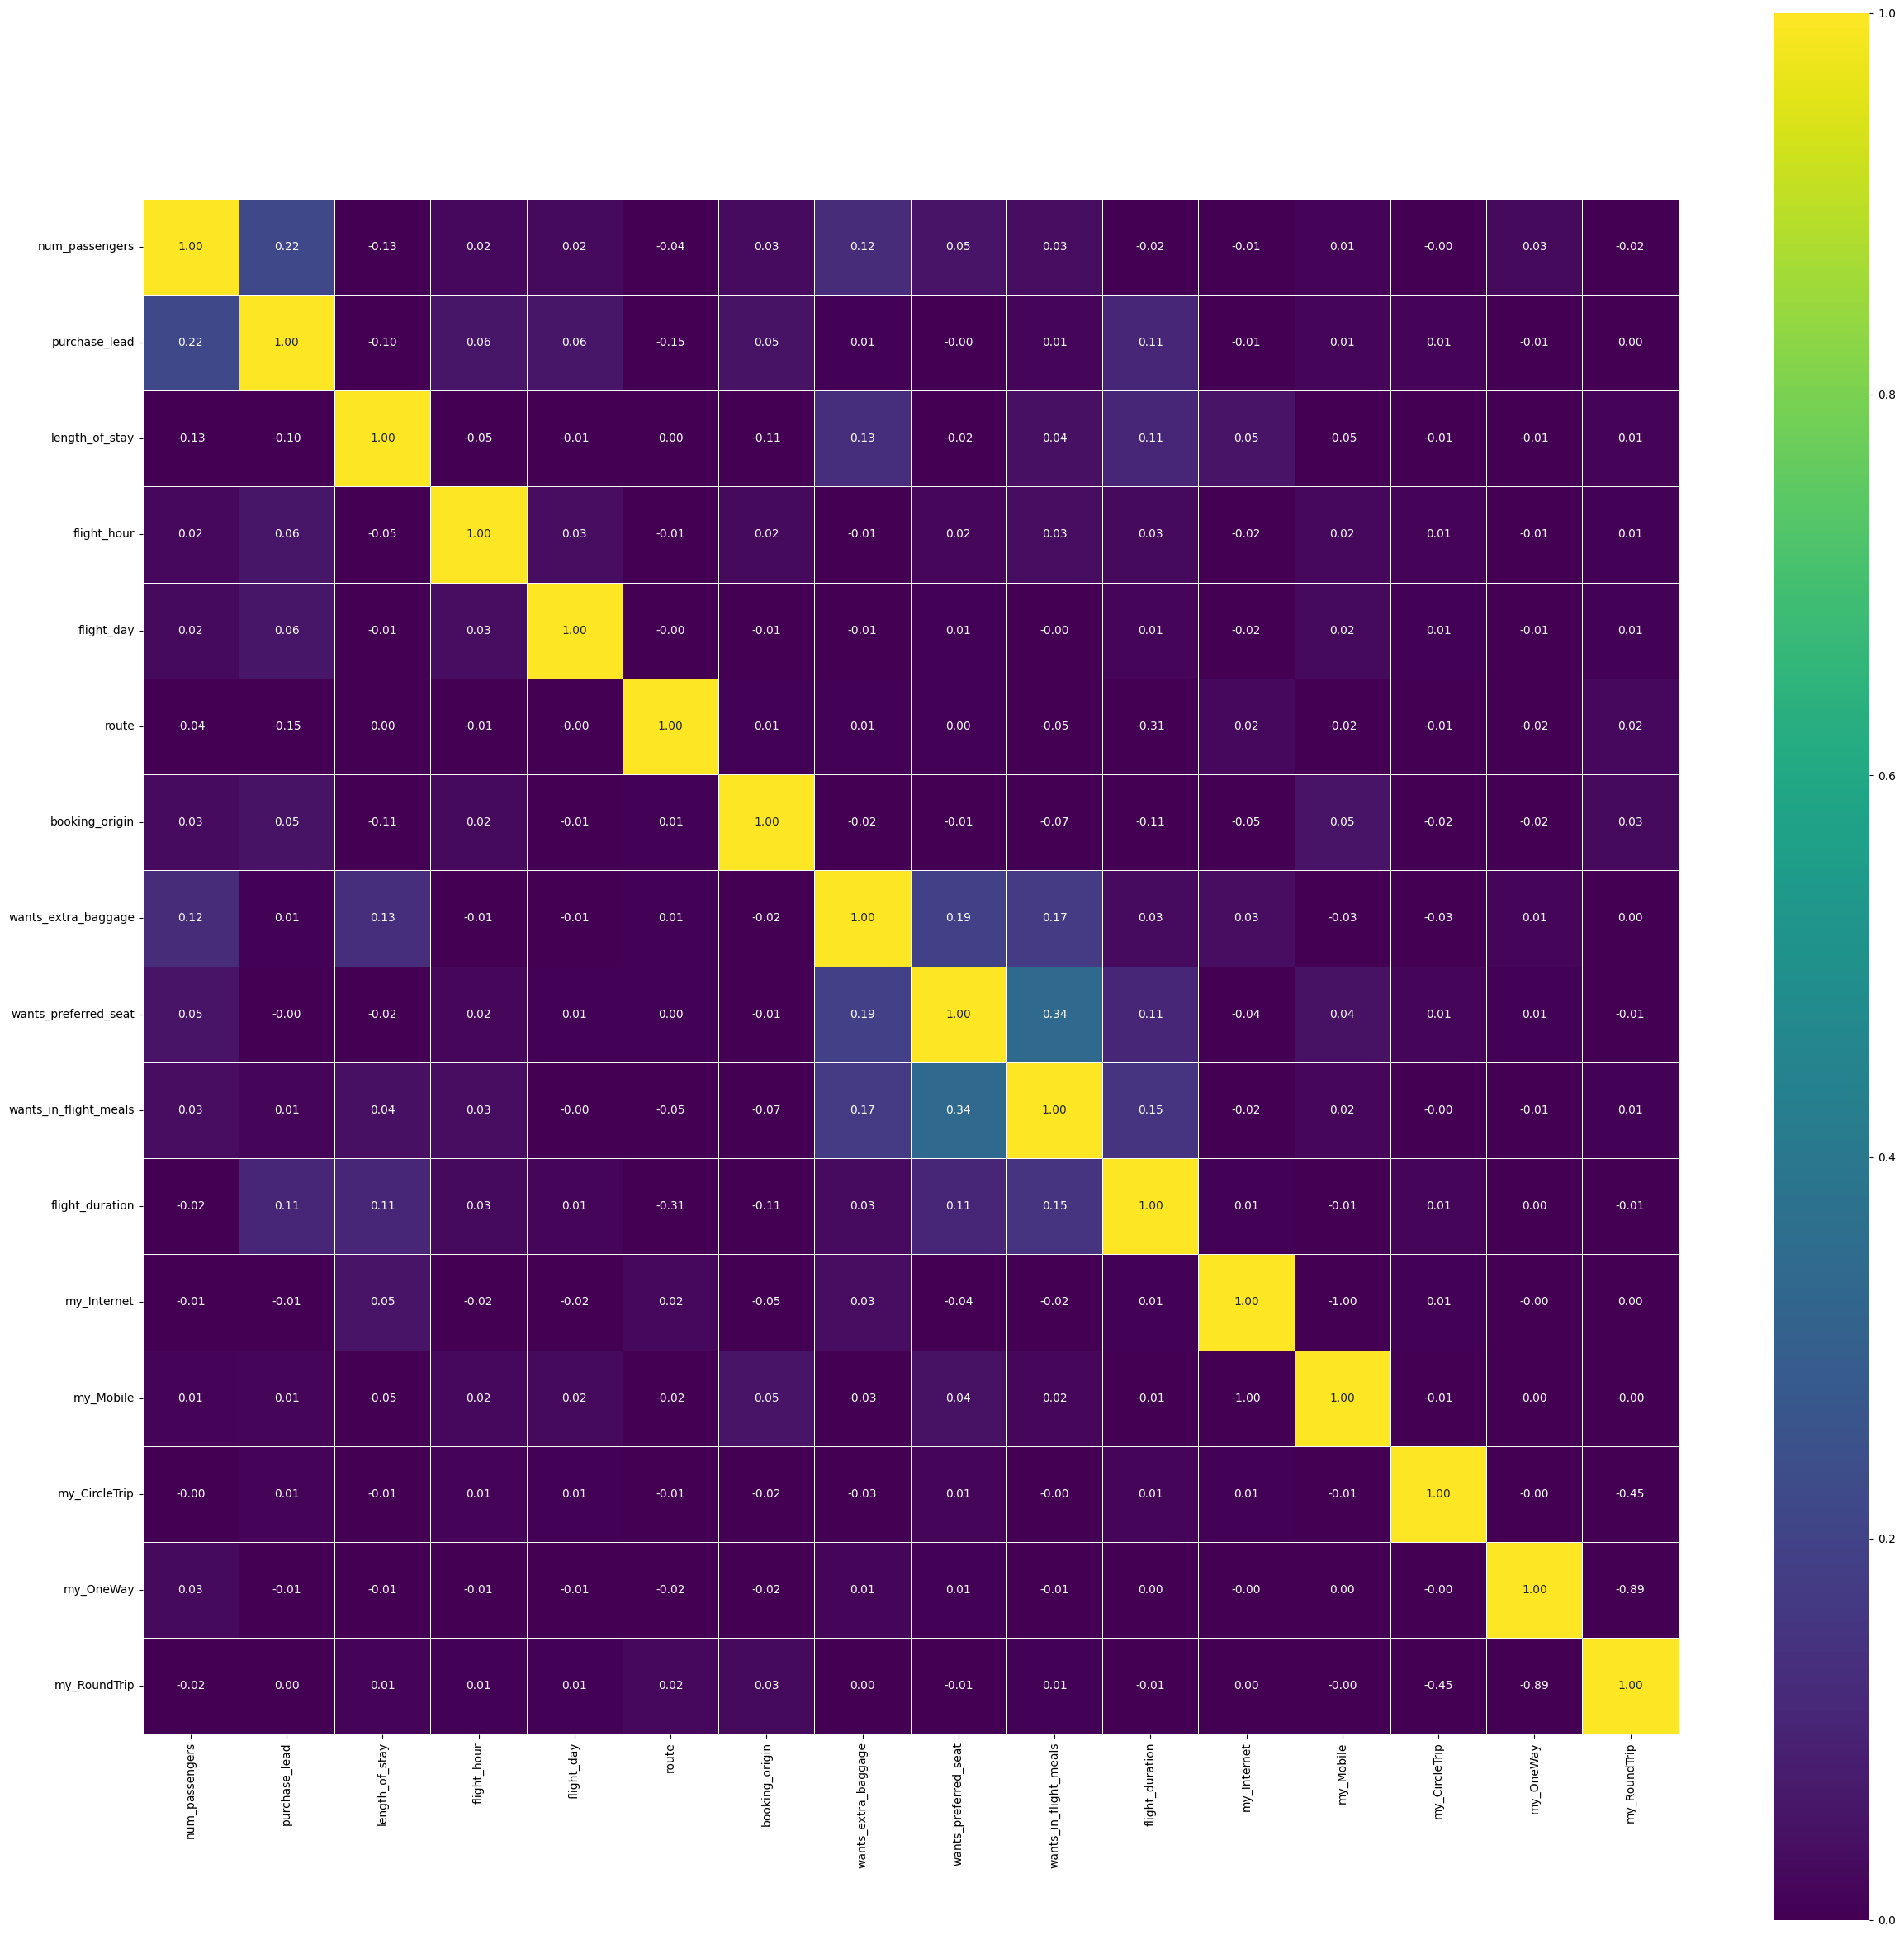

In [33]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_completed.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis', square = True)
plt.show() 

# Неуспешные бронирования¶

In [34]:
df_failed = df_num[df_num['booking_complete'] == 0]
df_failed.drop(['booking_complete'],axis=1,inplace=True)
df_failed

C:\Users\User\AppData\Local\Temp\ipykernel_9512\2174359015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_failed.drop(['booking_complete'],axis=1,inplace=True)


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,my_Internet,my_Mobile,my_CircleTrip,my_OneWay,my_RoundTrip
0,2,262,19,7,6,0,61,1,0,0,5.52,True,False,False,False,True
1,1,112,20,3,6,0,61,0,0,0,5.52,True,False,False,False,True
2,2,243,22,17,3,0,36,1,1,0,5.52,True,False,False,False,True
3,1,96,31,4,6,0,61,0,0,1,5.52,True,False,False,False,True
4,2,68,22,15,3,0,36,1,0,1,5.52,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,720,4,1,0,1,5.62,True,False,False,False,True
49996,1,111,6,4,7,720,4,0,0,0,5.62,True,False,False,False,True
49997,1,24,6,22,6,720,4,0,0,1,5.62,True,False,False,False,True
49998,1,15,6,11,1,720,4,1,0,1,5.62,True,False,False,False,True


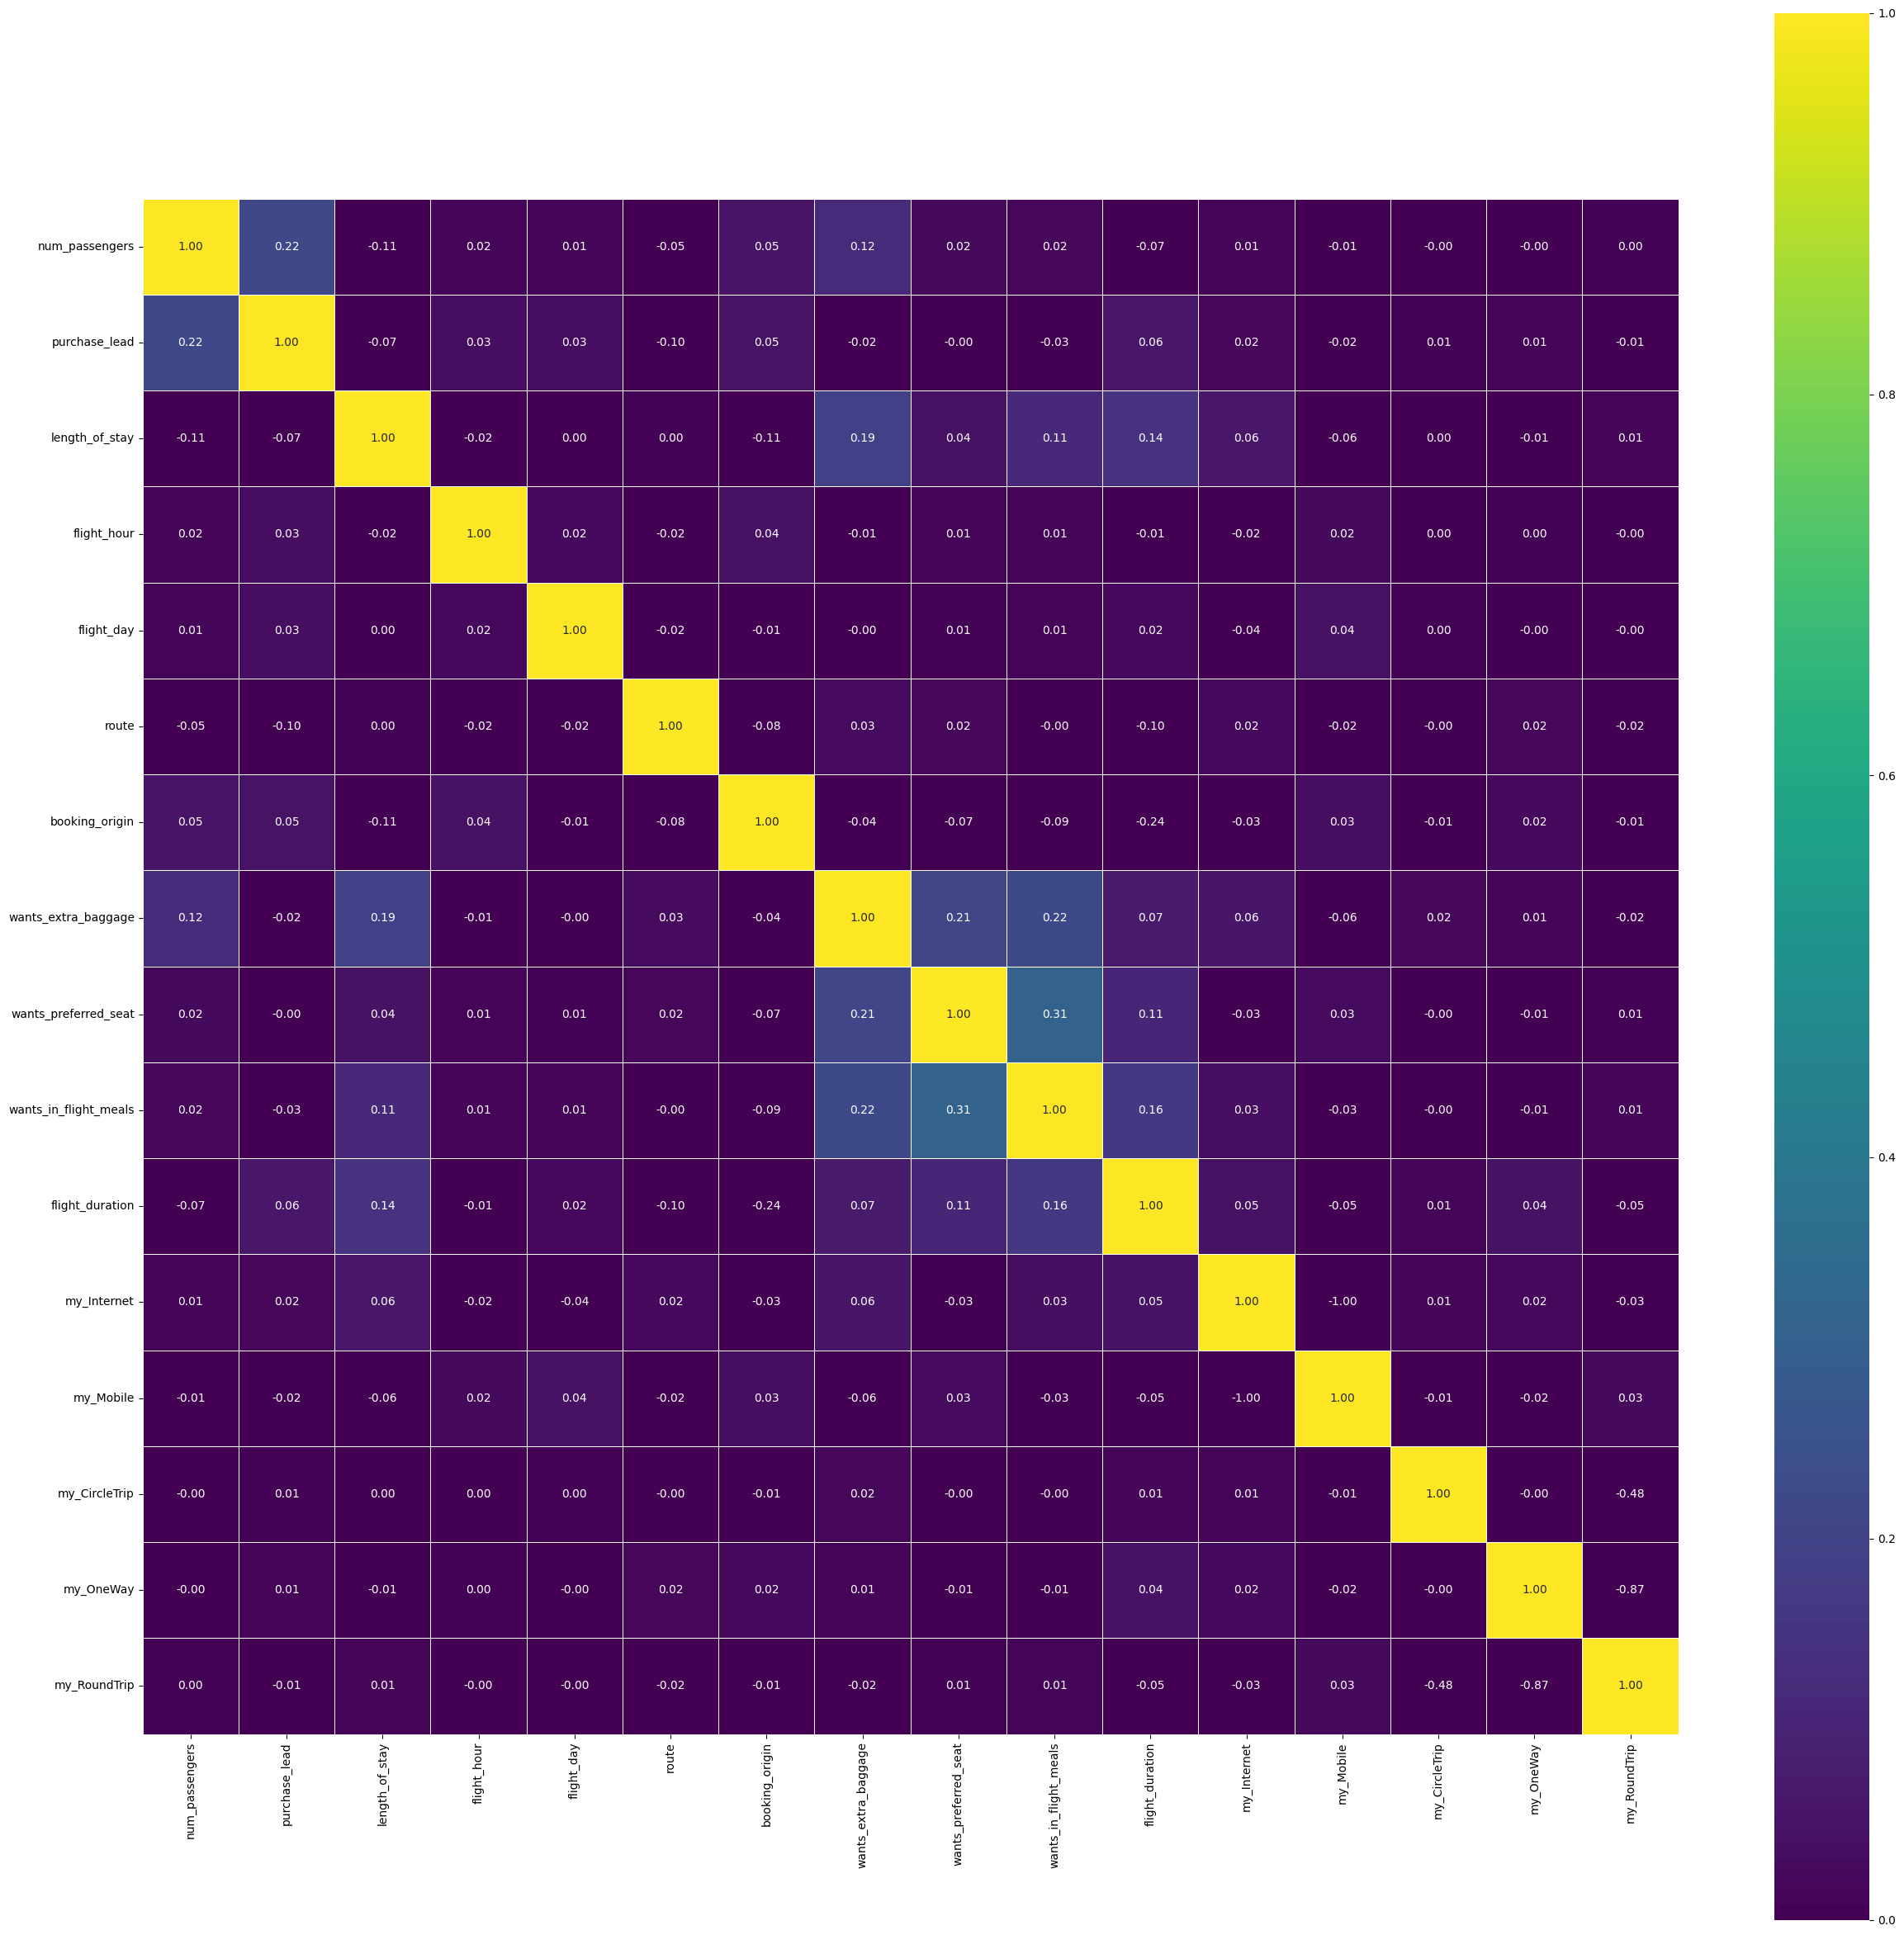

In [35]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_failed.corr(), annot=True, linewidths=.5, fmt='.2f', vmin=0, vmax=1, cmap='viridis', square = True)
plt.show() 

# Графики успешных бронирований

In [36]:
df_completed.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'my_Internet', 'my_Mobile', 'my_CircleTrip', 'my_OneWay',
       'my_RoundTrip'],
      dtype='object')

(array([4.669e+03, 1.583e+03, 3.700e+02, 2.460e+02, 1.340e+02, 2.530e+02,
        1.500e+01, 1.900e+01, 1.000e+01, 1.100e+01, 6.000e+00, 2.400e+01,
        1.200e+01, 2.000e+00, 4.000e+00, 4.000e+00, 4.000e+00, 7.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 3.000e+00, 5.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  16.54,  32.08,  47.62,  63.16,  78.7 ,  94.24, 109.78,
        125.32, 140.86, 156.4 , 171.94, 187.48, 203.02, 218.56, 234.1 ,
        249.64, 265.18, 280.72, 296.26, 311.8 , 327.34, 342.88, 358.42,
        373.96, 389.5 , 405.04, 420.58, 436.12, 451.66, 467.2 , 482.74,
        498.28, 513.82, 529.36, 544.9 , 560.44, 575.98, 591.52, 607.06,
        622.6 , 

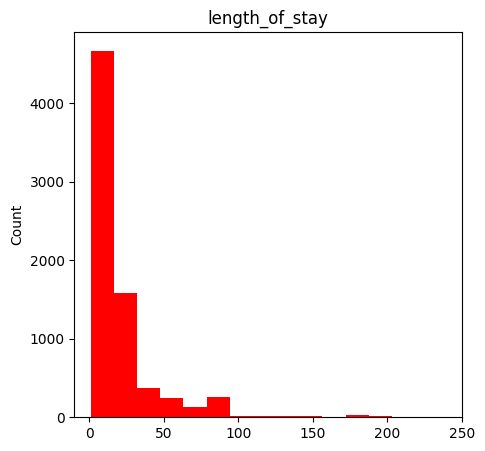

In [37]:
plt.figure(figsize=(5,5))
plt.title('length_of_stay')
plt.xlim (-10, 250)
plt.ylabel('Count')
plt.hist(df_completed['length_of_stay'], bins=50, color='red')

(array([1.817e+03, 1.226e+03, 1.003e+03, 6.510e+02, 4.630e+02, 3.510e+02,
        3.000e+02, 1.970e+02, 1.630e+02, 1.520e+02, 1.330e+02, 1.200e+02,
        1.120e+02, 1.170e+02, 1.190e+02, 7.200e+01, 8.200e+01, 5.800e+01,
        4.200e+01, 4.800e+01, 4.900e+01, 3.500e+01, 3.200e+01, 2.400e+01,
        1.500e+01, 8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  0.  ,  17.34,  34.68,  52.02,  69.36,  86.7 , 104.04, 121.38,
        138.72, 156.06, 173.4 , 190.74, 208.08, 225.42, 242.76, 260.1 ,
        277.44, 294.78, 312.12, 329.46, 346.8 , 364.14, 381.48, 398.82,
        416.16, 433.5 , 450.84, 468.18, 485.52, 502.86, 520.2 , 537.54,
        554.88, 572.22, 589.56, 606.9 , 624.24, 641.58, 658.92, 676.26,
        693.6 , 

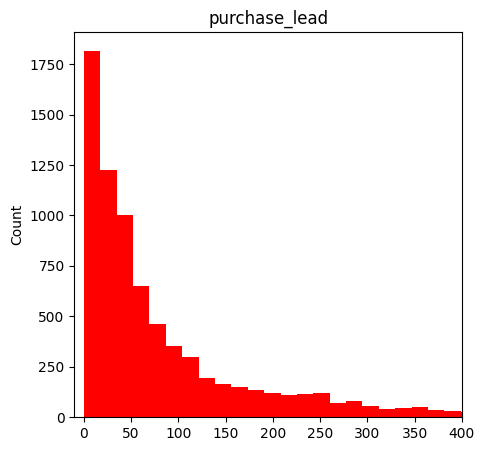

In [38]:
plt.figure(figsize=(5,5))
plt.title('purchase_lead')
plt.xlim (-10, 400)
plt.ylabel('Count')
plt.hist(df_completed['purchase_lead'], bins=50, color='red')

In [39]:
df_completed['purchase_lead'].min(), df_completed['purchase_lead'].max()

(0, 867)

In [40]:
df_completed.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
count,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000,7391.000000
mean,1.648491,79.959681,19.664727,9.157083,3.780138,388.033013,48.473143,0.744960,0.350156,0.457719,6.900475
std,1.062256,89.755331,33.995823,5.236008,1.969927,240.302103,27.758144,0.435913,0.477051,0.498243,1.528177
min,1.000000,0.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,4.670000
25%,1.000000,18.000000,5.000000,5.000000,2.000000,174.000000,36.000000,0.000000,0.000000,0.000000,5.520000
50%,1.000000,46.000000,6.000000,9.000000,4.000000,404.000000,51.000000,1.000000,0.000000,0.000000,6.620000
75%,2.000000,106.000000,23.000000,13.000000,5.000000,595.000000,54.000000,1.000000,1.000000,1.000000,8.670000
max,9.000000,867.000000,778.000000,23.000000,7.000000,797.000000,103.000000,1.000000,1.000000,1.000000,9.500000


In [41]:
df_failed.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
count,41890.000000,41890.000000,41890.000000,41890.000000,41890.000000,41890.000000,41890.000000,41890.000000,41890.000000,41890.000000,41890.000000
mean,1.579900,85.563762,23.651969,9.055431,3.819527,393.068513,36.445763,0.654691,0.286011,0.421151,7.346932
std,1.007919,90.500332,33.768309,5.443665,1.995732,224.887340,33.270659,0.475475,0.451900,0.493750,1.480669
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000
25%,1.000000,22.000000,5.000000,5.000000,2.000000,218.000000,4.000000,0.000000,0.000000,0.000000,5.620000
50%,1.000000,52.000000,17.000000,9.000000,4.000000,380.000000,36.000000,1.000000,0.000000,0.000000,7.570000
75%,2.000000,116.000000,29.000000,13.000000,5.000000,611.000000,58.000000,1.000000,1.000000,1.000000,8.830000
max,9.000000,704.000000,773.000000,23.000000,7.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000


In [52]:
df_failed['length_of_stay'].value_counts(normalize=True)

length_of_stay
6      0.143710
5      0.138529
4      0.108307
3      0.054930
17     0.038911
         ...   
237    0.000024
284    0.000024
342    0.000024
313    0.000024
262    0.000024
Name: proportion, Length: 323, dtype: float64

In [53]:
df_completed['length_of_stay'].value_counts(normalize=True)


length_of_stay
6      0.215262
5      0.182384
4      0.139494
3      0.067244
17     0.026113
         ...   
123    0.000135
233    0.000135
242    0.000135
369    0.000135
167    0.000135
Name: proportion, Length: 180, dtype: float64